<a href="https://colab.research.google.com/github/sujata1712/Capstone_Project_1/blob/main/Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CAPSTONE PROJECT 1:***


---


***Working with Numpy Matrices (Multidimensional Data)***

# **Introduction:**

In this project, we will look at body measurement data from the National Health and Nutrition Examination Survey (NHANES). We will manipulate, visualize, and analyze data using Python and various libraries such as NumPy and Matplotlib. The data include body measurements of adult males and females.

# **Importing Necessary Libraries**




In [2]:
import numpy as np                            # For numerical operations
import pandas as pd                           # For data manipulation
import matplotlib.pyplot as plt               # Necessary module for plotting purpose
import seaborn as sns                         # For Data Visualization

# **Connect to Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.   **Download and Load Data**



First, we'll download the NHANES dataset and import the appropriate CSV files into NumPy matrices.

*   nhanes_adult_male_bmx_2020.csv
*   nhanes_adult_female_bmx_2020.csv

In [26]:
# Download the files and read them

male=np.genfromtxt("/content/drive/MyDrive/CSV file/nhanes_adult_male_bmx_2020.csv",delimiter=',',skip_header=1)
female=np.genfromtxt("/content/drive/MyDrive/CSV file/nhanes_adult_female_bmx_2020.csv",delimiter=',',skip_header=1)



**Summary:**

The two datasets are loaded into NumPy matrices called 'male' and 'female', with each row representing a person and each column being a body measurement.

The skip_header=1 parameter is used to ignore the header row of the CSV files.

# 2.  **Read and Explore the Data**



Extract the shape and first few rows of the matrices for further analysis.

In [31]:
print("Male data shape:", male.shape)
print("Female data shape:", female.shape)

print("First five rows of male data:\n", male[:5])
print("First five rows of female data:\n", female[:5])

Male data shape: (4081, 7)
Female data shape: (4221, 7)
First five rows of male data:
 [[ 36.8 157.1  37.5  40.2  19.   79.5  80. ]
 [ 41.2 162.6  34.3  39.1  22.7  80.   66.2]
 [ 42.8 148.2  34.   33.6  21.5  77.2  81.4]
 [ 43.7 157.   34.3  36.9  24.1  80.8  65.3]
 [ 44.1 164.2  35.5  41.3  24.2  79.4  66. ]]
First five rows of female data:
 [[ 32.6 151.5  32.4  33.4  20.4  77.3  64.7]
 [ 36.2 147.3  32.   36.9  22.1  79.8  56.4]
 [ 36.9 158.8  32.   38.4  19.   80.2  62.7]
 [ 37.7 158.3  35.5  38.8  19.8  74.   66.2]
 [ 38.2 147.   30.7  33.7  21.3  79.4  63.7]]


Clean missing & duplicate values of the datasets.

In [32]:
# Check for missing values in the male and female matrices
np.isnan(male).sum(), np.isnan(female).sum()

# Remove rows with any NaN values
male = male[~np.isnan(male).any(axis=1)]
female = female[~np.isnan(female).any(axis=1)]

# Ensure no duplicate rows
male = np.unique(male, axis=0)
female = np.unique(female, axis=0)

# Ensure data ranges are realistic (example: weight > 0 kg, height > 0 cm)
male = male[(male[:, 0] > 0) & (male[:, 1] > 0)]
female = female[(female[:, 0] > 0) & (female[:, 1] > 0)]

# print shape after cleaning
print("Male data shape after cleaning:", male.shape)
print("Female data shape after cleaning:", female.shape)

Male data shape after cleaning: (4081, 7)
Female data shape after cleaning: (4221, 7)


**Summary:**

First, the form and first few rows of both male and female participants were effectively recovered for analysis.

Then we clean the two matrices.

# 3.   **Plot Histograms of Weights**



Next, we will visualize the distribution of weights for both males and females using histograms.

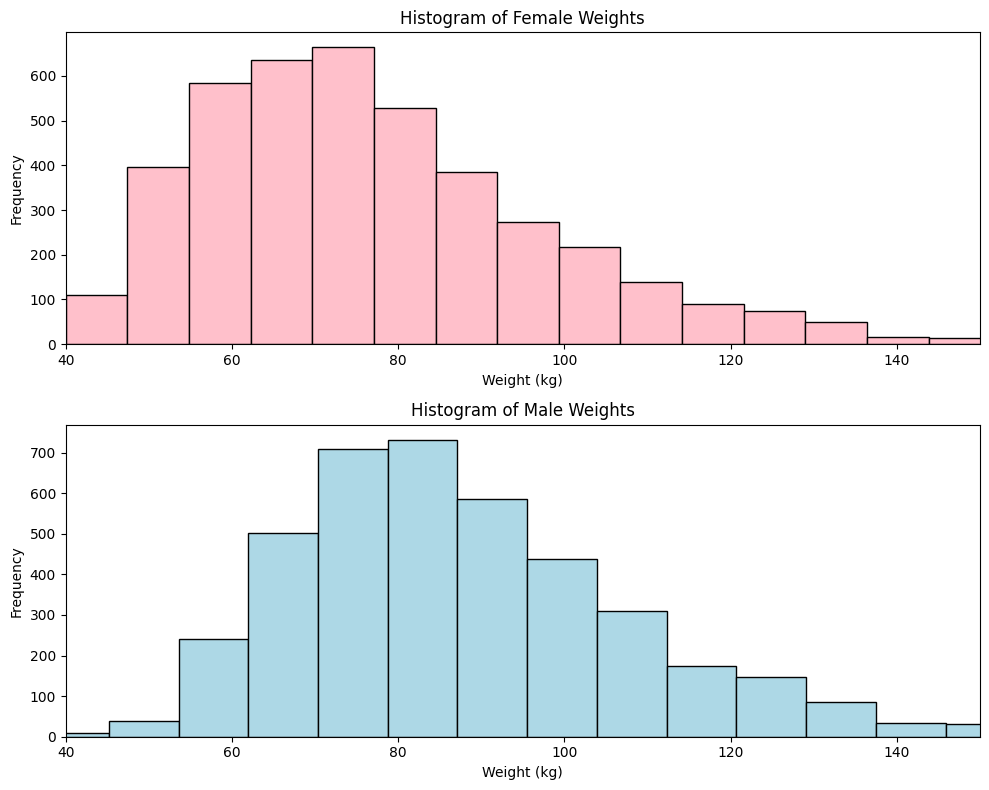

In [34]:
# Extract weights
male_weights = male[:, 0]
female_weights = female[:, 0]

# Set the figure size
plt.figure(figsize=(10, 8))

# Top subplot for female weights
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=20, color='pink', edgecolor='black')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(40, 150)                           # Set appropriate limits

# Bottom subplot for male weights
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(40, 150)                           # Set same limits for comparison

plt.tight_layout()
plt.show()

**Summary:**

This code creates male and female weight histograms and arranges them in different subplots for comparison. For a consistent comparison, the x-axis bounds are set to the identical values for each histogram.

# 4. **Box-and-Whisker Plot for Weights**

We will create a box-and-whisker plot to compare the weight distributions of males and females.

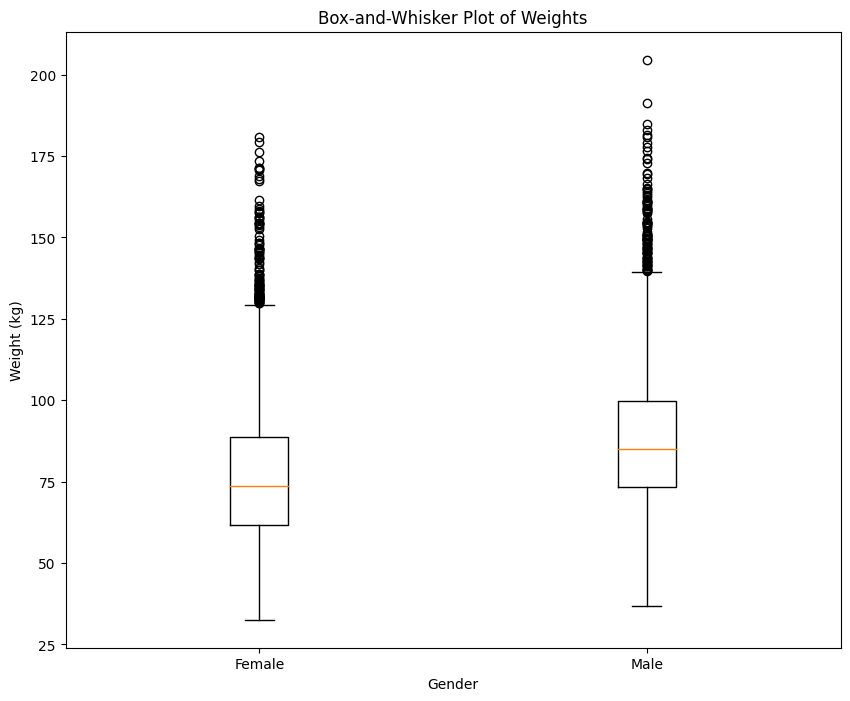

In [35]:
# Extract weights
male_weights = male[:, 0]
female_weights = female[:, 0]

# Set the figure size
plt.figure(figsize=(10, 8))

# Create boxplot and whisker plot
plt.boxplot([female_weights,male_weights],labels=['Female','Male'])
plt.title('Box-and-Whisker Plot of Weights')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()


**Observations:**
* **Median Weights:**
Male weights have a higher median weight than female weights, suggesting that male weights have a larger central tendency.
* **Interquartile Range (IQR):**
Males exhibit a greater interquartile range (IQR) than females, indicating a greater degree of variability in their weights.
* **Range and Outliers:** Males may have more outliers than females, and their whiskers tend to grow longer. This suggests that the weight distribution of males is more widely distributed and encompasses a wider range of weights.

**Summary:**

In comparison to females, males typically have greater median weights and a more variable weight distribution, as demonstrated by the box-and-whisker plot. In the upper weight range, males also show more outliers, meaning that there are a few people with noticeably higher weights.

# 5. **Basic Numerical Aggregates**

Next, we will compute basic numerical aggregates for the weights of both genders.

In [ ]:
# Compute basic statistics

female_stats = {
    'mean': np.mean(female_weights),
    'median': np.median(female_weights),
    'std': np.std(female_weights),
    'min': np.min(female_weights),
    'max': np.max(female_weights),
    'skewness': np.mean(((female_weights - np.mean(female_weights)) /  np.std(female_weights)) ** 3)
}

male_stats = {
    'mean': np.mean(male_weights),
    'median': np.median(male_weights),
    'std': np.std(male_weights),
    'min': np.min(male_weights),
    'max': np.max(male_weights),
    'skewness': np.mean(((male_weights - np.mean(male_weights)) /  np.std(male_weights)) ** 3)
}

female_stats, male_stats


({'mean': 77.40379057095475,
  'median': 73.6,
  'std': 21.54250829019315,
  'min': 32.6,
  'max': 180.9,
  'skewness': 1.0333610718679898},
 {'mean': 88.36454300416565,
  'median': 85.0,
  'std': 21.418936717962495,
  'min': 36.8,
  'max': 204.6,
  'skewness': 0.9842810741662348})

**Observations:**

- **Location:** The mean and median weights of males are higher than those of females, suggesting that they weigh more overall.
- **Dispersion:** A higher standard deviation indicates that males have more variation in their weight.
- **Shape:** The two distributions have a right skew, with a tail that extends toward higher weights and more people weighing less than the mean.

**Summary:**

In comparison to the female distribution, the male weight distribution exhibits a greater mean, median, and dispersion. It looks that both distributions are right-skewed, with men showing higher variation in their weights.

# 6. **Adding BMI to Female Matrix**

The steps below can be used to add a Body Mass Index (BMI) column to the female matrix:

To extract the heights, first convert the centimeter values to meters. Then, use the formula **BMI = weight (kg) / (height (m))^2** to calculate the BMI. Finally, add a BMI column. Add a new column to the female matrix with the computed BMI values.

In [ ]:
# Extract height in meters (assuming height is in cm in the matrix)
female_height = female[:, 1] / 100

# Calculate BMI
female_bmi = female_weights / (female_height ** 2)

# Add BMI as a new column to the female matrix
female = np.column_stack((female, female_bmi))

# print first few rows
print("First five rows of updated female data with BMI:\n", female[:5])

First five rows of updated female data with BMI:
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


**Summary:**

* **'female_height':** The height is converted from centimeters to meters using it.
* **'female_bmi'** determines the BMI of every participant who is female.
The BMI values are appended to the female matrix as the final column by using * **'np.column_stack((female, female_bmi))'**.

The BMI values for each female participant will be added to an additional column in the female matrix once this code has been performed.


# 7. **Standardize Female Matrix**

The female dataset will be standardized by calculating z-scores for every column.

The procedures below can be used to generate a new matrix called zfemale, which is a standardized version of the female dataset with z-scores applied to all of its columns:

1. Determine the female matrix's Mean and Standard Deviation for every column.
2. To standardize each column, divide the result by the standard deviation and subtract the mean.


In [ ]:
# Compute the mean and standard deviation for each column in the female matrix
mean_female = np.mean(female, axis=0)
std_female = np.std(female, axis=0)

# Calculate the z-scores for each column (standardize the data)
zfemale = (female - mean_female) / std_female

print("First five rows of standardized female data:\n", zfemale[:5])

First five rows of standardized female data:
 [[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


**Summary:**

The female dataset has been standardized, allowing for better comparison across measurements .

# 8. **Scatterplot Matrix (Pairplot) for Standardized Female Data and  Compute Pearson's and Spearman's Correlation Coefficients**


Proceed as follows to generate a scatterplot matrix (pairplot) from the zfemale matrix for the standardized versions of height, weight, hip circumference, waist circumference, and BMI, as well as to calculate the Pearson's and Spearman's correlation coefficients:

### 1. ***Draw the Scatterplot Matrix(Pairplot):***

First, let's create the pairplot using the 'seaborn' library.

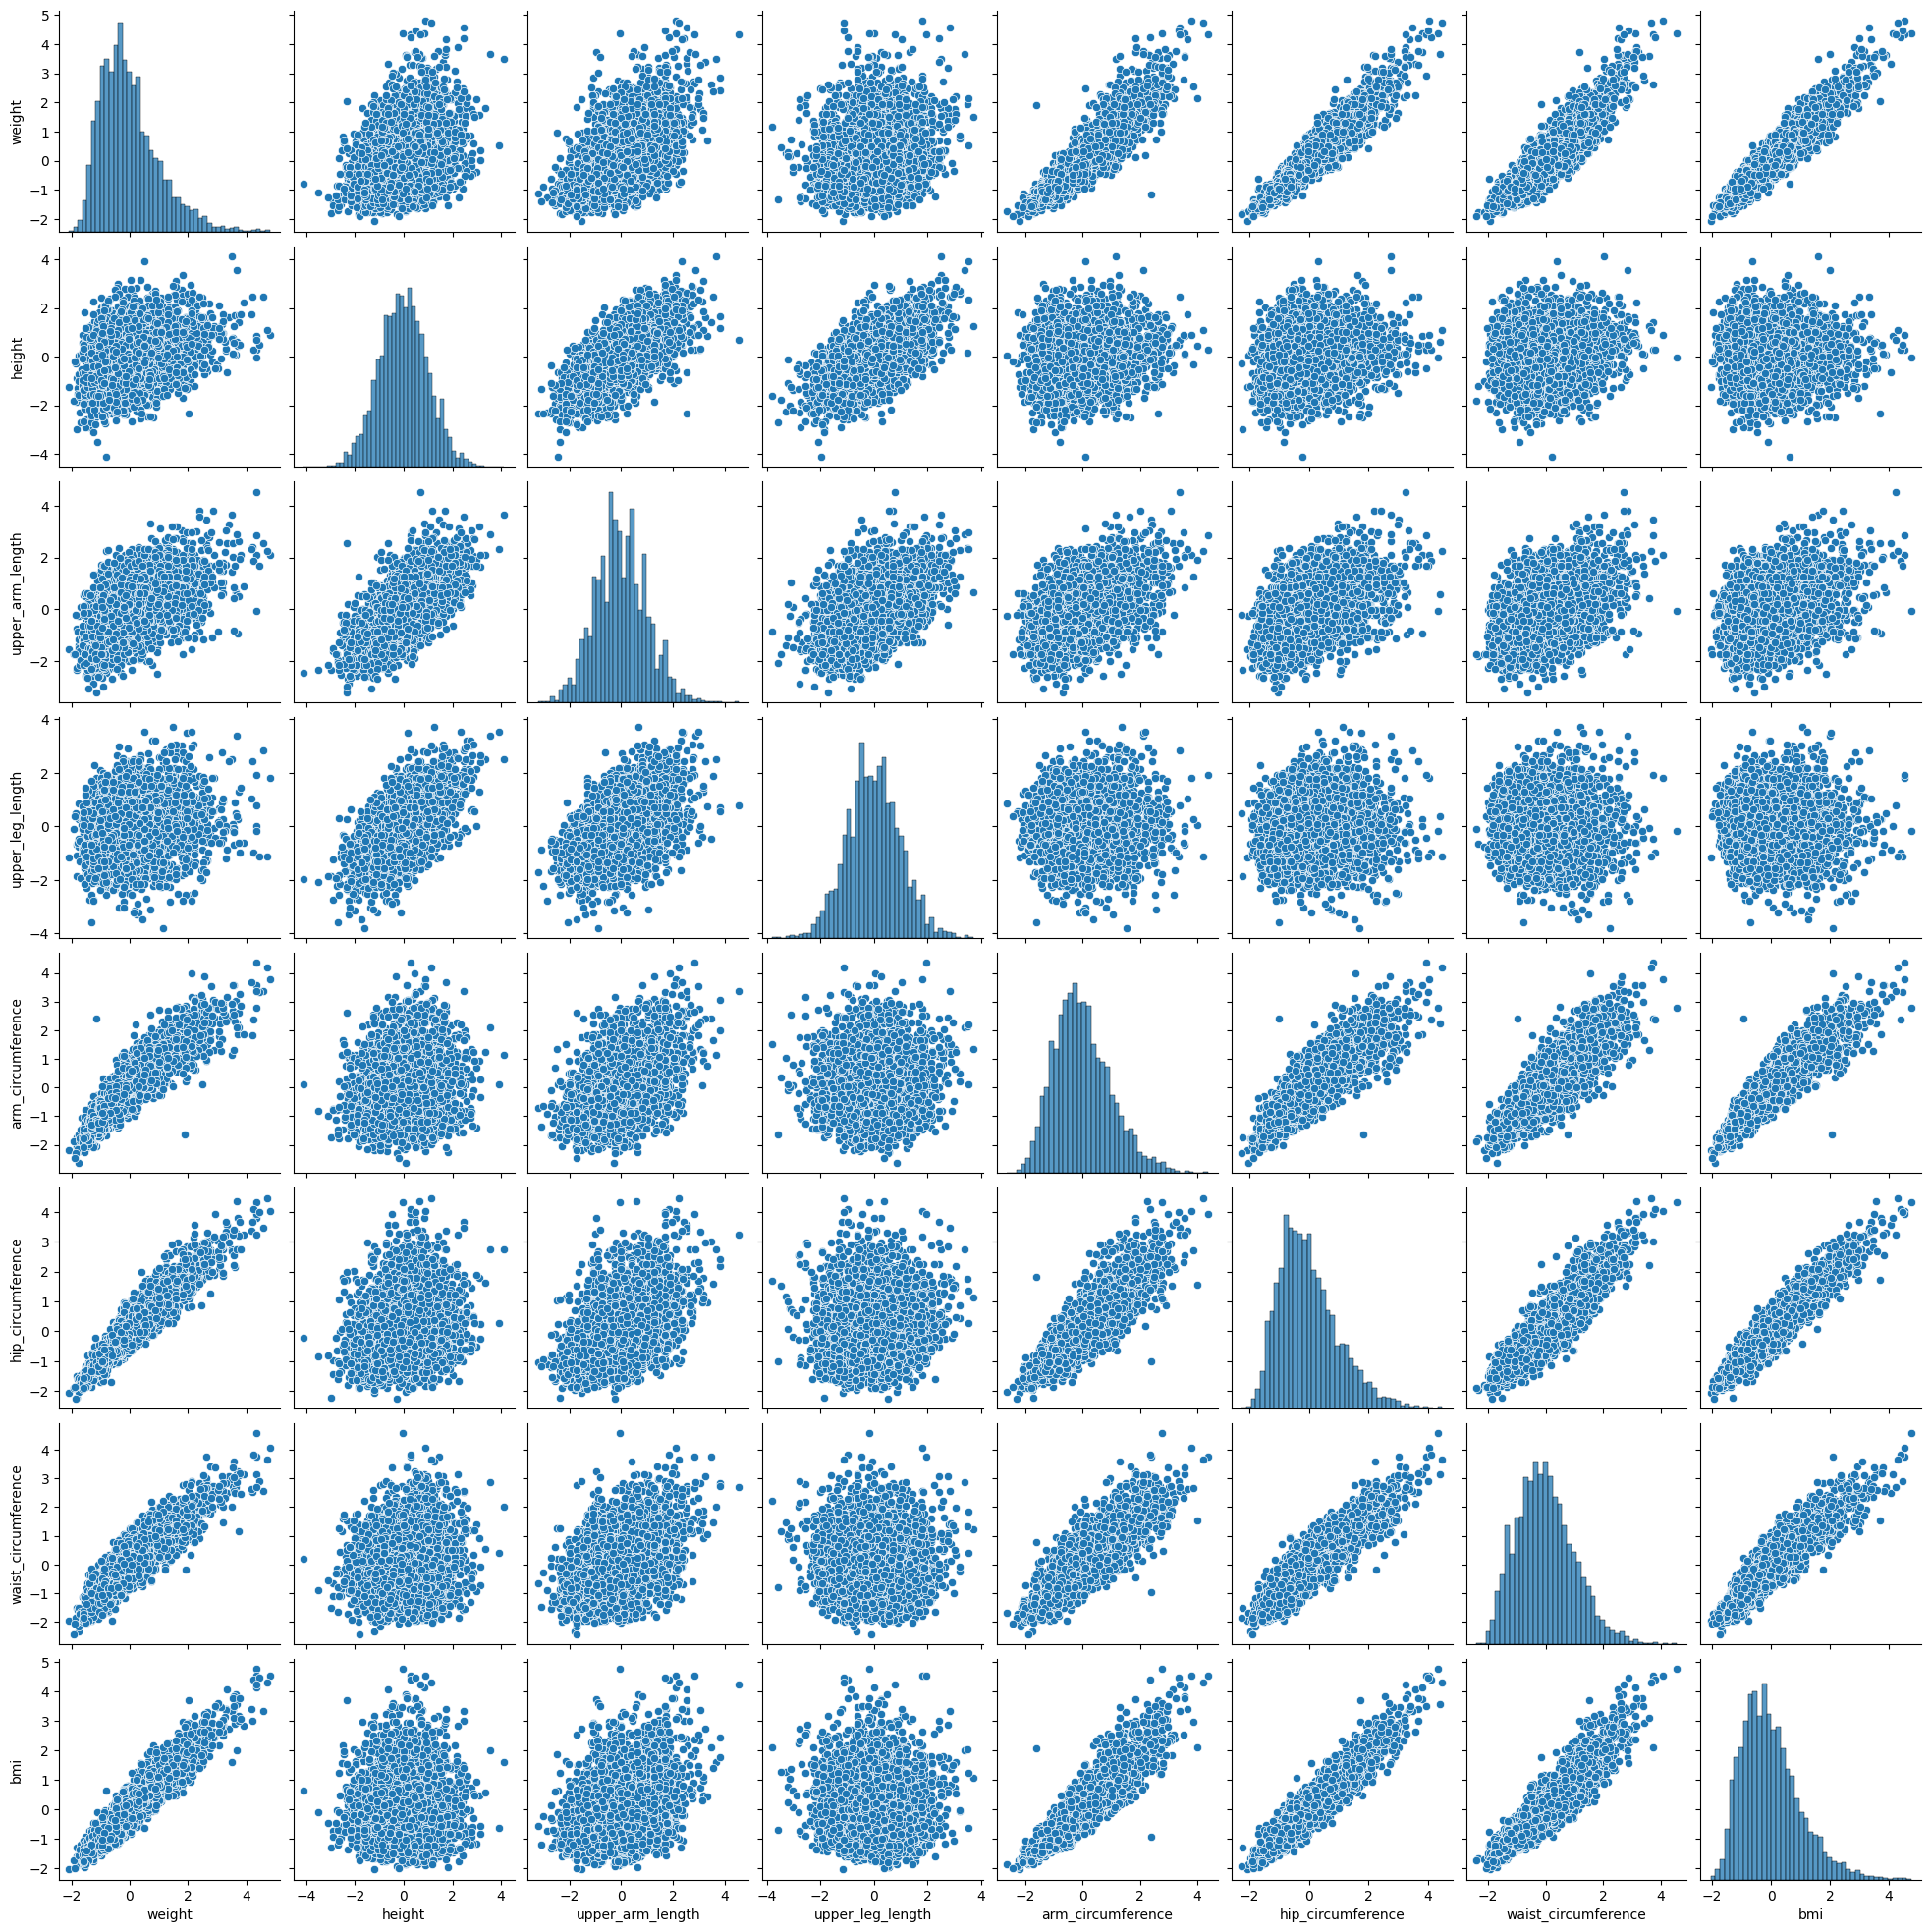

In [ ]:
# 1. Draw the Scatterplot Matrix(Pairplot)

# Convert standardized matrix to DataFrame
df_zfemale = pd.DataFrame(zfemale, columns=['weight', 'height', 'upper_arm_length', 'upper_leg_length', 'arm_circumference', 'hip_circumference', 'waist_circumference', 'bmi'])

# Create a pairplot
sns.pairplot(df_zfemale)
plt.show()



**Summary:**

Relationships between the chosen variables are visualized using the scatterplot matrix. Next, we will calculate the correlation coefficients.

### 2.  ***Compute Pearson's and Spearman's Correlation Coefficients:***  

Next, let's calculate both Pearson's and Spearman's correlation coefficients for these variables.

In [ ]:
# Compute Pearson's correlation coefficients
pearson_corr = df_zfemale.corr(method='pearson')

# Compute Spearman's correlation coefficients
spearman_corr = df_zfemale.corr(method='spearman')

# Display the correlation matrices
print("Pearson's Correlation Coefficients:\n", pearson_corr)
print("\nSpearman's Correlation Coefficients:\n", spearman_corr)

Pearson's Correlation Coefficients:
                        weight    height  upper_arm_length  upper_leg_length  \
weight               1.000000  0.345496          0.551563          0.193186   
height               0.345496  1.000000          0.667911          0.657202   
upper_arm_length     0.551563  0.667911          1.000000          0.475645   
upper_leg_length     0.193186  0.657202          0.475645          1.000000   
arm_circumference    0.905385  0.151955          0.453122          0.079876   
hip_circumference    0.946553  0.202895          0.459400          0.100268   
waist_circumference  0.904550  0.126547          0.427893         -0.034803   
bmi                  0.945900  0.033077          0.364660         -0.014819   

                     arm_circumference  hip_circumference  \
weight                        0.905385           0.946553   
height                        0.151955           0.202895   
upper_arm_length              0.453122           0.459400   
upper_l

**Interpretation of Results:**

**Pearson's Correlation**: It measures the strength and direction of linear correlations. For example, a significant positive Pearson correlation between weight and BMI indicates that when weight increases, so does BMI.

**Spearman's Correlation:** Measures the strength of monotonic correlations based on data rank. It may emphasize non-linear relationships.


# 9. **Compute Waist-to-Height and Waist-to-Hip Ratios**

We will compute the waist circumference to height ratio and the waist circumference to hip circumference ratio for both male and female participants.

In [ ]:
# Extract necessary columns from the male and female matrices

m_waist = male[:, 6]    # Assuming waist circumference is in column 7
m_height = male[:, 1]   # Assuming height is in column 2
m_hip = male[:, 5]      # Assuming hip circumference is in column 6

f_waist = female[:, 6]    # Assuming waist circumference is in column 7
f_height = female[:, 1]   # Assuming height is in column 2
f_hip = female[:, 5]      # Assuming hip circumference is in column 6

# Compute the waist-to-height and waist-to-hip ratios for males

male_wht_ratio = m_waist / m_height      # male_waist_height_ratio
male_whp_ratio = m_waist / m_hip         # male_waist_hip_ratio

# Compute the waist-to-height and waist-to-hip ratios for females

female_wht_ratio = f_waist / f_height     # female_waist_height_ratio
female_whp_ratio = f_waist / f_hip        # female_waist_hip_ratio

# Add the computed ratios as new columns to the male and female matrices
male = np.column_stack((male, male_wht_ratio, male_whp_ratio))
female = np.column_stack((female, female_wht_ratio, female_whp_ratio))

print("First five rows of updated male data with ratios:\n", male[:5])
print("\nFirst five rows of updated female data with ratios:\n", female[:5])


First five rows of updated male data with ratios:
 [[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416   0.66044981
    1.11275416   0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852   0.47122693
    0.91851852   0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8        109.6          0.59147329   1.01669759   0.59147329
    1.01669759   0.59147329   1.01669759]
 [ 86.         167.8         39.5         38.4         29.
  106.4        108.3          0.6454112    1.01785714   0.6454112
    1.01785714   0.6454112    1.01785714]
 [ 99.4        181.6         40.4         39.9         36.
  120.2        107.           0.58920705   0.89018303   0.58920705
    0.89018303   0.58920705   0.89018303]]

First five rows of updated female data with ratios:
 [[ 97.1        160.2         34.7         40.8       

**Summary:**

* The male and female matrices now include two new columns:
1. **Waist-to-Height Ratio:** This metric shows how the waist size compares to the height, with larger values potentially indicating greater health hazards.
2. Waist-to-Hip Ratio: Compares waist size to hip size to provide insight into fat distribution patterns.

Higher ratios are frequently linked to an increased risk of cardiovascular illnesses and other obesity-related health problems, making them essential for assessing the participants' health profiles.

# 10. **Box-and-Whisker Plot for Ratios**

We will create a box-and-whisker plot to compare the distribution of waist-to-height and waist-to-hip ratios between males and females.

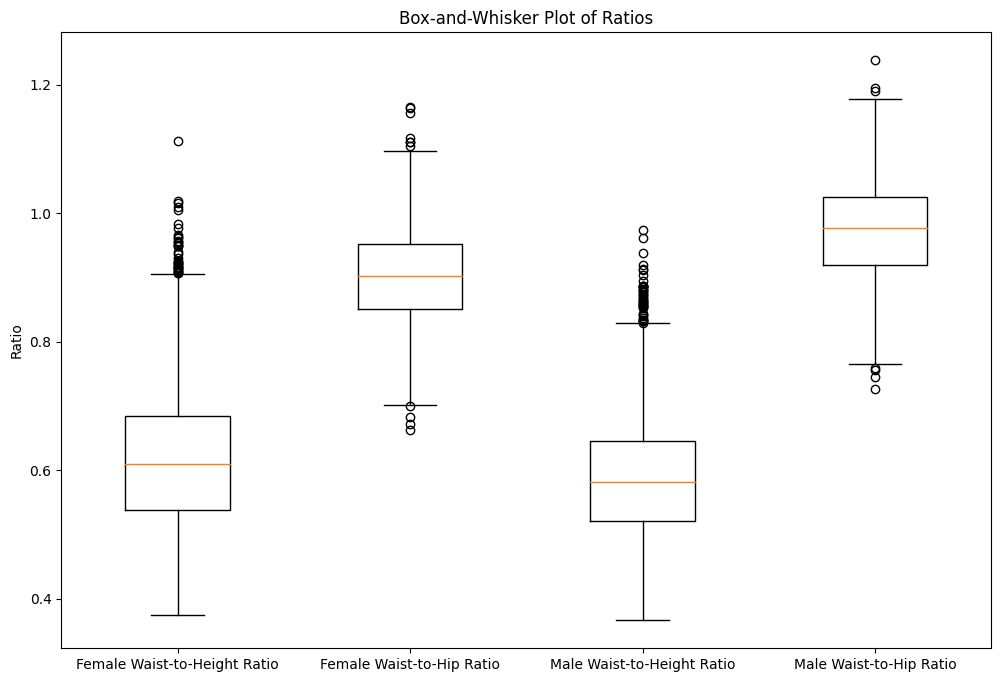

In [ ]:
# Prepare data for boxplot
data_ratios = [
    female[:, -2],  # Female Waist-to-Height Ratio
    female[:, -1],  # Female Waist-to-Hip Ratio
    male[:, -2],    # Male Waist-to-Height Ratio
    male[:, -1]     # Male Waist-to-Hip Ratio
]

# Create the box-and-whisker plot
plt.figure(figsize=(12, 8))
plt.boxplot(data_ratios, labels=['Female Waist-to-Height Ratio', 'Female Waist-to-Hip Ratio', 'Male Waist-to-Height Ratio', 'Male Waist-to-Hip Ratio'])
plt.title('Box-and-Whisker Plot of Ratios')
plt.ylabel('Ratio')
plt.show()


**Observations:**

In comparison to men, women have a lower median and less variation (**Waist-to-Height Ratio:**).
  - **Males:** Greater variability and a higher median.

**Waist-to-Hip Ratio:** - **Females:** Wider hips are reflected by a higher median with less variation.
  - **Males:** Less noticeable hips are indicated by a lower median and greater variation.

**Summaray:**

The waist-to-hip and waist-to-height ratios show clear disparities between boys and girls according to the box-and-whisker plot:

* Due to usual gender disparities in fat distribution, women typically have higher waist-to-hip ratios but lower waist-to-height ratios.

* Men often have lower waist-to-hip and higher waist-to-height ratios, which suggests a distinct distribution pattern of body fat and greater variation in their body

# 11. **Advantages and Disadvantages:**

#### **Body Mass Index (BMI):**
- **Advantages:**
  - Simple and quick to calculate using height and weight.
  - Widely used as a general screening tool for obesity and underweight.
  - Easily compares across large populations.

- **Disadvantages:**
  - Doesn't distinguish between muscle and fat mass.
  - Can misclassify athletic individuals as overweight or obese.
  - Does not consider fat distribution.

#### **Waist-to-Height Ratio:**
- **Advantages:**
  - Simple to measure and calculate.
  - Provides information on fat distribution.
  - Better predictor of health risks than BMI.

- **Disadvantages:**
  - Less commonly used than BMI.
  - May be affected by measurement errors.

#### **Waist-to-Hip Ratio:**
- **Advantages:**

    - Indicates fat distribution.
    - Useful in assessing risk of cardiovascular diseases.
    - Better predictor of metabolic syndrome than BMI.

- **Disadvantages:**

    - More complex to measure accurately.
    - Less commonly used than BMI

# 12. **Standardized Measurements for Extremes in BMI**

Finally, we will display the standardized body measurements for the 5 individuals with the lowest and highest BMIs.

In [ ]:
# Find indices of lowest and highest BMIs
sorted_indices = np.argsort(zfemale[:, -1])    # Sort by BMI column

# Identify indices of the lowest and highest BMI
lowest_indices = sorted_indices[:5]        # Indices of the 5 participants with the lowest BMI
highest_indices = sorted_indices[-5:]      # Indices of the 5 participants with the highest BMI

# Extract the standardized measurements for the lowest and highest BMIs
lowest_measurements = zfemale[lowest_indices]
highest_measurements = zfemale[highest_indices]

# Print the standardized measurements
print("Standardized Measurements for 5 Participants with the Lowest BMI:\n", lowest_measurements)
print("\nStandardized Measurements for 5 Participants with the Highest BMI:\n", highest_measurements)

Standardized Measurements for 5 Participants with the Lowest BMI:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Standardized Measurements for 5 Participants with the Highest BMI:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782

**Interpretation of Results:**
* Lowest BMI:
    - Generally, these individuals have lower standardized weights and higher standardized heights, suggesting they are leaner with less body fat.

* Highest BMI:
    - These individuals exhibit higher standardized weights and lower standardized heights, reflecting a heavier and potentially more obese body type.

# **Conclusion:**

In this project, NumPy and Matplotlib are used to evaluate adult male and female body measures from the NHANES dataset. We computed BMI, investigated weight distributions, and contrasted gender-specific metrics using histograms and boxplots. We assessed correlations and standardized the data to assess the links between the bodily measures. We also calculated and compared the ratios of waist to hip and waist to height. The research offers useful information for health evaluations and gender-based comparisons by shedding light on measurement variability and body composition.

# **Final Thoughts:**

The usefulness of NumPy and Matplotlib for data processing and visualization was shown in this project. Using the NHANES dataset, we were able to obtain a comprehensive understanding of the body measures of adult males and females through the application of statistical methods and visual tools. The studies emphasized the usefulness and constraints of different body measurement metrics and disclosed significant gender variations. Subsequent research endeavours may investigate adjunct variables impacting body composition and health consequences, or employ sophisticated statistical methodologies to enhance the analysis.

All things considered, the research demonstrated the importance of data analysis in identifying trends and connections in datasets pertaining to health, which can guide decision-making and health assessments.